# Bài tập SVM

## Sử dụng SVC để phân nhóm cho tập Titanic dataset
- dataset: 'Titanic_train.csv', 'Titanic_test.csv'


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Data mining

## Read dataset

In [2]:
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Number of column and row

In [3]:
df_train.shape


(891, 12)

In [4]:
df_test.shape

(418, 11)

## Statistic

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Remove NaN values
df_train.dropna(subset=['Age'], inplace=True)
df_test.dropna(subset=['Age'], inplace=True)

# Visualization

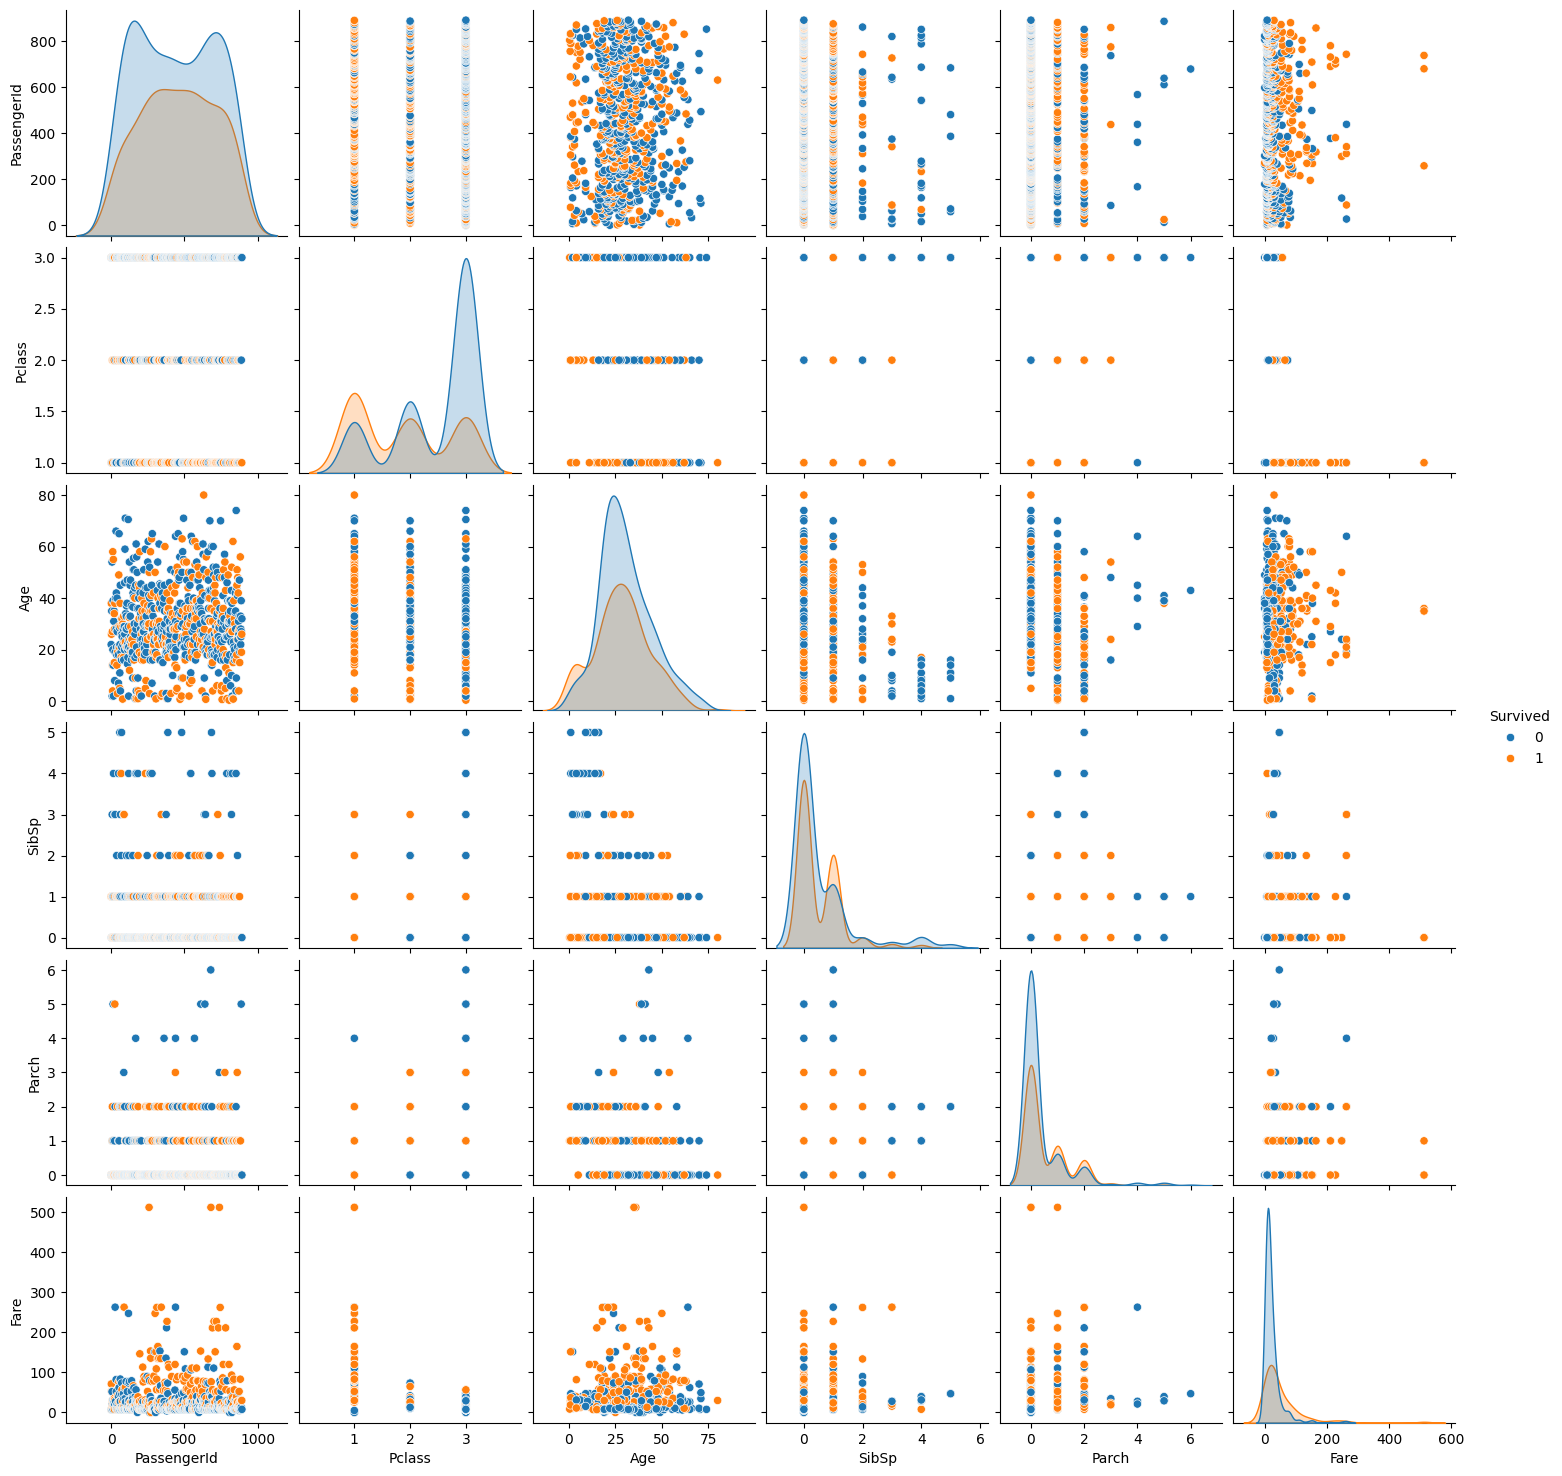

In [8]:
sns.pairplot(df_train, hue = 'Survived', kind='scatter')
plt.show()

In [9]:
df_train['female'] = pd.get_dummies(df_train['Sex'])['female'].values

In [10]:
X = df_train.loc[:, ['female', 'Age']]
y = df_train.loc[:, ['Survived']]
print(X)
print(y)

     female   Age
0     False  22.0
1      True  38.0
2      True  26.0
3      True  35.0
4     False  35.0
..      ...   ...
885    True  39.0
886   False  27.0
887    True  19.0
889   False  26.0
890   False  32.0

[714 rows x 2 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
885         0
886         0
887         1
889         1
890         0

[714 rows x 1 columns]


# Build model and train



In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(571, 2) 571
(143, 2) (143, 1)


In [13]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters

In [14]:
svc=SVC(kernel='linear')

In [15]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

AttributeError: 'DataFrame' object has no attribute 'ravel'